In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.io.wavfile import write, read 
from scipy.io import wavfile
import math
from time import sleep
from math import floor
import pyaudio
import wave
import random
import pandas as pd

In [56]:
#ЗАПИСЬ
filename = "recorded.wav"
chunk = 1024
FORMAT = pyaudio.paInt16
channels = 1
sample_rate = 44100
record_seconds = 7
p = pyaudio.PyAudio()
stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
frames = []
print("Recording")
for i in range(int(sample_rate / chunk * record_seconds)):
  data = stream.read(chunk)
  frames.append(data)
stream.stop_stream()
stream.close()
p.terminate()
wf = wave.open(filename, "wb")
wf.setnchannels(channels)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(sample_rate)
wf.writeframes(b"".join(frames))
wf.close()

Recording


In [45]:
class modulator:

    def __init__(self):
        self.sample_rate, self.freq0, self.freq1, self.change_time = 44100, 1000, 2000, 0.5

    def set_values(self, sample_rate, freq0, freq1, text, change_time):
        self.sample_rate, self.freq0, self.freq1, self.text, self.change_time = sample_rate, freq0, freq1, text, change_time
    
    def set_freq0(self, freq0):
       self.freq0 = freq0
    
    def set_freq1(self, freq1):
       self.freq1 = freq1
    
    def set_sample_rate(self, sample_rate):
       self.sample_rate = sample_rate
    
    def set_text(self, text):
       self.text = text
    
    def set_change_time(self, change_time):
       self.change_time = change_time

    @staticmethod
    def generate_sine_wave(freq, sample_rate, duration):
      x = np.linspace(0, duration, int(sample_rate*duration), endpoint=False)
      frequencies = x * freq
      y = np.sin((2 * np.pi) * frequencies)
      return x, y
    
    def signal_modulation(self): #Следует доработать, т.к неэффективно работает. Но это мало на что влияет, на этом этапе скорость не нужна
      change_time, text, freq0, freq1, sample_rate = self.change_time, self.text, self.freq0, self.freq1, self.sample_rate
      duration = change_time * len(text)
      num = int(duration / change_time)
      time = np.array([], dtype = np.int16)
      signal = np.array([], dtype = np.int16)
      for i in range(num):
        if text[i] == "0":
            freq = freq0
        if text[i] == "1":
            freq = freq1
        time_diff, data = self.generate_sine_wave(freq, sample_rate, change_time)
        signal = np.concatenate((signal, data), axis = None)
        time = np.concatenate((time, time_diff), axis = None)
      return time, signal
    
class wav_manager:
   
   def __init__(self):
    self.recorded_name = "recorded.wav"
    self.writing_name = "tone_ex"

   def set_recorded_name(self, name):
    self.recorded_name = name

   def set_writing_name(self, name):
    self.writing_name = name

   def get_data_sample_rate(self):
    sample_rate, data = wavfile.read(self.recorded_name)
    duration = len(data) / sample_rate 
    return data, sample_rate
   
   def write_sound(self, sample_rate, data):
      write(self.writing_name, sample_rate, data)

def record(record_seconds, filename):
  chunk = 1024
  FORMAT = pyaudio.paInt16
  channels = 1
  sample_rate = 44100
  p = pyaudio.PyAudio()
  stream = p.open(format=FORMAT,
                channels=channels,
                rate=sample_rate,
                input=True,
                output=True,
                frames_per_buffer=chunk)
  frames = []
  print("Recording")
  for i in range(int(sample_rate / chunk * record_seconds)):
    data = stream.read(chunk)
    frames.append(data)
  stream.stop_stream()
  stream.close()
  p.terminate()
  wf = wave.open(filename, "wb")
  wf.setnchannels(channels)
  wf.setsampwidth(p.get_sample_size(FORMAT))
  wf.setframerate(sample_rate)
  wf.writeframes(b"".join(frames))
  wf.close()

def recording_no_stop(duration_array):
  num = len(duration_array)
  sleep(3)
  print("RECORDING")
  i = 0
  for i in range(num):
    duration = duration_array[i]
    for l in range(10000000):
      flag = ""
      while len(flag) == 0:
        f = open("flag.txt", "r")
        flag = f.read()
        f.close()
      flag = bool(int(flag[len(flag) - 1]))      
      if flag:
        break
      sleep(0.001)
    record(duration, "recorded" + str(i))
    print("MAKING PROGRESS")
  print("DONE")
    

def get_code_array(max_length):
  code_array = []
  for i in range(4, max_length + 4, 4):
    for z in range(20):
      code = ""
      for j in range(i):
        code += str(random.randint(0,1))
      code_array.append(code)
  return code_array

def get_duration_array(code_array, change_time):
  duration_array = []
  for i in range(len(code_array)):
    code = code_array[i]
    duration = change_time * len(code) + 2.5
    duration_array.append(duration)
  return duration_array




  





class decoder:
   
   def __init__(self):
      self.sample_rate, self.freq0, self.freq1, self.change_time, self.index_range, self.draw_graph, self.max_param, self.amplitude_threshold, self.print_progress, self.check_yf = 44100, 1000, 2000, 0.5, 2, False, 8, 0.45, True, False
   
   def set_print_yf(self, flag):
     self.check_yf = flag
   
   def set_print_progress(self, flag):
     self.print_progress = flag
   
   def set_max_param(self, n):
     self.max_param = n
   
   def set_amplitude_threshold(self, param):
     self.amplitude_threshold = param
   
   def set_draw_graph(self, flag):
     self.draw_graph = flag
    
   def set_freqses(self, freq0 = 1000, freq1 = 2000):
      self.freq0, self.freq1 = freq0, freq1

   def get_freqs_indexes(self, xf):
     index_freq0, index_freq1 = int(7.5 * len(xf) / 330750 * self.freq0), int(7.5 * len(xf) / 330750 * self.freq1)
     return index_freq0, index_freq1

   def fourier_abs(self, data):
    sample_rate = self.sample_rate
    duration = len(data) / sample_rate
    xf = rfftfreq(len(data), 1 / sample_rate)
    yf = rfft(data)
    yf = yf.flatten()
    return np.array([xf, np.abs(yf)])
   
   def get_index_start_end_of_longest_ones(self, lt):
     m = 0
     index = 0
     cnt = 0
     end_index = 0
     length = 0
     for i in range(len(lt)):
       a = bool(lt[i])
       if a:
         cnt += 1
       if not a:
         if cnt > m:
           m = cnt
           index = i - cnt
           end_index = index + cnt -1
           length = end_index - index + 1
         cnt = 0
     if cnt > m:
       index = i + 1 - cnt
     return index, end_index, length
   
   def fourier_for_array(self, data_array, sample_rate):
    _, ans = self.fourier_abs(data_array[0])
    ans = [ans]
    for i in range(1, len(data_array)):
      data_window = data_array[i]
      xf_for_array, yf_window = self.fourier_abs(data_window)
      ans = np.concatenate((ans, [yf_window]), axis = 0)
    return xf_for_array, ans
   
   def abs_diff(self, yf_window, xf, freq0, freq1, range_index):
    absolute_difference = abs(self.freq0_sum(yf_window) - self.freq1_sum(yf_window)) ** 2
    return absolute_difference
   
   def calc_index(self, freq, xf):
     index = int(len(xf) / (self.sample_rate / 2) * freq)
     return index
   
   def freq_sum(self, yf, xf, freq):
     index_range = self.index_range
     index_freq = self.calc_index(freq, xf)
     s = 0
     for i in range(index_freq - index_range, index_freq + index_range + 1):
       amplitude = yf[i]
       s += abs(amplitude)
     return s
   
   def set_change_time(self, change_time):
     self.change_time = change_time

   
   def fill_in(self, yf_array, xf, freq0, freq1, amplitude_threshold):
     freq0, freq1 = self.freq0, self.freq1
     bool_array = np.zeros(len(yf_array), dtype = bool)True
     normalized_yf = self.normalize_data_array(yf_array, xf, freq0, freq1)
     for i in range(len(bool_array)):
       window = normalized_yf[i]
       amplitude_freq0, amplitude_freq1 = self.freq_sum(window, xf, freq0), self.freq_sum(window, xf, freq1)
       print(amplitude_freq0, amplitude_freq1)
       if amplitude_freq0 + amplitude_freq1 > amplitude_threshold:
         bool_array[i] = True
     return bool_array
   
   def normalize_data_array(self, yf_array, xf, freq0, freq1):
    normalized_array = yf_array
    medium_amplitude_freq0, medium_amplitude_freq1 = self.calc_medium(yf_array, xf, freq0), self.calc_medium(yf_array, xf, freq1)
    for i in range(len(yf_array)):
      window = yf_array[i]
      normalized_array[i] = self.normalize(window, xf, medium_amplitude_freq0, medium_amplitude_freq1)
    return normalized_array
   
   def decoder_1(self, data):
     freq0, freq1 = self.freq0, self.freq1
     sample_rate, change_time, range_index = self.sample_rate, self.change_time, self.index_range #Включаем все параметры
     duration = len(data) / sample_rate      #whole time
     N0 = int(duration / change_time)        #number of windows
     data_array = self.secure_split(data, N0)         #array of arrays with sound data
     points_per_window = int(change_time * sample_rate) #Количество отсчетов за такт
     xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
     yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, self.amplitude_threshold) #В этом массиве отображается длина сигнала
     rough_beginning_index, rough_end_index, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)#index where signal  starts (rough estimation)
     actual_sound = 0
     definite_sound = 0
     if N % 4 == 0: #По идее, такое должно происходить не очень часто. Смещаем сигнал пока не определится как N + 1
       if self.print_progress:
         print("Смещаем сигнал")
       while N % 4 == 0:  
         data = np.concatenate((data[int(points_per_window / 2):], np.zeros(int(points_per_window / 2))), axis = None)#Само смещение
         N0 = int(duration / change_time)       
         data_array = self.secure_split(data, N0)   
         points_per_window = int(change_time * sample_rate)
         xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
         yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, self.amplitude_threshold)
         rough_beginning_index, rough_end_index, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
     if N % 4 == 1:
       if self.print_progress:
         print("Сигнал определился нормально")
       definite_sound_array, supposed_sound_array, p = self.sound_array_by_index(data, rough_beginning_index, points_per_window, N) #Здесь мы достаем два массива: в одном полностью содержится сигнал (включая шумы),  а во второй - должен превратиться в сигнал (находится внутри первого)
       actual_sound, F_max = self.find_sound_1(N - 1, definite_sound_array, supposed_sound_array, self.max_param) #Находим сам сигнал
       code = self.decoding(actual_sound, N - 1)#Декодируем сигнал
       if self.print_progress:
         print("Определенная длина равна", N - 1)
       if self.check_yf:
         print(yf_for_array_bool)        
       if self.draw_graph:
         _, definite_yf_array = self.fourier_for_array(self.secure_split(definite_sound_array, N), sample_rate) #Эта часть необязательна: она нужна лишь для построения функции (наглядное представление)
         definite_sound, _, _ = self.sound_array_by_index(data, rough_beginning_index, points_per_window, N)
         _, m, act = self.plotting_function(definite_yf_array, definite_sound_array, supposed_sound_array, freq0, freq1, xf_for_array, range_index, N, sample_rate)
         print(m - F_max)
       definite_sound = 0
     if N % 4 == 2:
       if self.print_progress:
         print("You done goofed up")#Этого не должно быть ни при каких обстоятельствах. Почти наверняка накосячили с параметрами
       code = "rofl"
     if N % 4 == 3:
       print("Это имеет очень маленький шанс произойти. Скорее всего, допущена ошибка")
       definite_sound_array, supposed_sound_array, p = self.sound_array_by_index_special(data, rough_beginning_index, points_per_window, N)#На эту часть забейте, практически до этого не доходит, я вообще не уверен что здесь нет ошибок в коде
       actual_sound = self.find_sound(N + 1, definite_sound_array, supposed_sound_array)
       code = self.decoding(actual_sound, N + 1)
       _, definite_yf_array = self.fourier_for_array(self.secure_split(definite_sound_array, N + 1), 44100)
     return code, actual_sound, definite_sound
   
   def sound_array_by_index_special(self, data, index_left, points_per_window, N):
     definite_sound_array = data[int(points_per_window * (index_left - 1)): int(points_per_window * (N + index_left + 1))]
     supposed_sound_array = data[int(points_per_window * (index_left - 1)): int(points_per_window * (N + index_left - 1))]
     return definite_sound_array, supposed_sound_array, points_per_window
   
   
     
   
   def decoding(self, sound, N):
     code = ""
     xf, yf_array = self.fourier_for_array(self.secure_split(sound, N), self.sample_rate)
     for i in range(len(yf_array)):
       window = yf_array[i]
       amp1, amp2 = self.freq_sum(window, xf, self.freq0), self.freq_sum(window, xf, self.freq1)
       if amp1 > amp2:
         code += "0"
       if amp1 < amp2:
         code += "1"
     return code


   def find_max(self, x, sound_data, N, l, definite_sound_data):
    next_x = x
    while len(next_x) > 4:
      x_array = self.secure_split(next_x, 3)
      next_x = np.array([x_array[0], x_array[1]])
      x1, x2, x3, x4 = x_array[0][0], x_array[1][0], x_array[2][0], x_array[2][len(x_array[0]) - 1]
      F1, F2, F3, F4 = self.calc_funcions(sound_data, N, x1, x2, x3, x4, definite_sound_data, l)
      if F2 > F3:
        next_x[0], next_x[1] = x_array[0], x_array[1]
        next_x = next_x.flatten()
      else:
        next_x[0], next_x[1] = x_array[1], x_array[2]
        next_x = next_x.flatten()    
    ans_x = np.max(next_x)
    return ans_x, F2
     
   
   def find_sound(self, N, definite_sound_array, supposed_sound_array):
    target_sound_data, definite_sound_data = supposed_sound_array.flatten(), definite_sound_array.flatten()
    l, l2 = len(target_sound_data), len(definite_sound_data)
    X = np.linspace(0, l2 - l, l2 - l)
    X1, X2= self.secure_split(X,2)[0], self.secure_split(X,2)[1]
    X1, X2 = X1.astype(int), X2.astype(int)
    ans_x1, F1 = self.find_max(X1, target_sound_data, N, l, definite_sound_data)
    ans_x2, F2 = self.find_max(X2, target_sound_data, N, l, definite_sound_data)
    if F2 > F1:
      ans = ans_x2
    else:
      ans = ans_x1
    return self.sound_data_by_x(definite_sound_data, ans, l)
   
   def find_sound_1(self, N, definite_sound_array, supposed_sound_array, n):
    target_sound_data, definite_sound_data = supposed_sound_array.flatten(), definite_sound_array.flatten()
    l, l2 = len(target_sound_data), len(definite_sound_data)
    X = np.linspace(0, l2 - l, l2 - l)
    x = np.array(self.secure_split(X, n))
    ans_array = np.zeros(n)
    F_array = np.zeros(n)
    x, ans_array = x.astype(int), ans_array.astype(int)
    for i in range(n):
      Xc = x[i]
      ans_x, F = self.find_max(Xc, target_sound_data, N, l, definite_sound_data)
      ans_array[i], F_array[i] = ans_x, F
    index = np.argmax(F_array)
    max_F = np.max(F_array)
    ans = ans_array[index]
    return self.sound_data_by_x(definite_sound_data, ans, l), F

   def sound_data_by_x(self, definite_sound_data, x, l):
     ans_sound_data = definite_sound_data[int(x):int(x + l - 1)]
     return ans_sound_data
   
   def F(self, sound_array, N):
     data_array = self.secure_split(sound_array, N)
     xf, yf_array = self.fourier_for_array(data_array, self.sample_rate)
     func = self.calc_function(yf_array, xf)
     return func


       

   def calc_funcions(self, sound_data, N, x1, x2, x3, x4, definite_sound_data, l):
     sound_data1, sound_data2, sound_data3, sound_data4 = self.sound_data_by_x(definite_sound_data, x1, l), self.sound_data_by_x(definite_sound_data, x2, l), self.sound_data_by_x(definite_sound_data, x3, l), self.sound_data_by_x(definite_sound_data, x4, l)
     F1, F2, F3, F4 = self.F(sound_data1, N), self.F(sound_data2, N), self.F(sound_data3, N), self.F(sound_data4, N)
     return F1, F2, F3, F4

   def sound_array_by_index(self, data, index_left, points_per_window, N):
    definite_sound_array = data[int(points_per_window * (index_left)): int(points_per_window * (N + index_left))]
    supposed_sound_array = data[int(points_per_window * (index_left)): int(points_per_window * (N - 1 + index_left))]
    return definite_sound_array, supposed_sound_array, points_per_window
     

   def secure_split(self, d_array, N):
     if len(d_array) % N !=0:
       d_array = np.concatenate((d_array, np.zeros(N - len(d_array) % N)), axis = None)
     d_array = np.split(d_array, N)
     l = np.shape(d_array)
     if len(l) == 3:
        d_array = np.reshape(d_array, (l[0], l[1]))
     return np.array(d_array)
   

  

   def normalize(self, array, xf, medium_amplitude_freq0, medium_amplitude_freq1):
    freq0_amplitude, freq1_amplitude = 0, 0
    index_freq0, index_freq1 = self.calc_index(self.freq0, xf), self.calc_index(self.freq1, xf)
    freq0_amplitude, freq1_amplitude = self.freq_sum(array, xf, self.freq0), self.freq_sum(array, xf, self.freq1)
    array[index_freq0 - self.index_range: index_freq0 + self.index_range + 1] = 0
    array[index_freq1 - self.index_range: index_freq1 + self.index_range + 1] = 0
    array[index_freq0], array[index_freq1]  = freq0_amplitude / medium_amplitude_freq0, freq1_amplitude / medium_amplitude_freq1
    return array

   def calc_medium(self, yf_array, xf, freq):
    medium_amplitude = 0
    sum = 0
    N = len(yf_array)
    for i in range(N):
      window = yf_array[i]
      amplitude = self.freq_sum(window, xf, freq)
      sum += abs(amplitude)
    medium_amplitude = sum / N
    return medium_amplitude
   
   def make_step(self, definite_sound_array):
     step = len(definite_sound_array) * 0.0001
     return int(step)
   
   def apply_step(self, definite_sound_array, supposed_sound_array, N, step, number_of_steps, sample_rate):
     changed_sound_array = definite_sound_array[int(step * number_of_steps + step):int(step * number_of_steps + len(supposed_sound_array) + step)]
     changed_sound_data_array = self.secure_split(changed_sound_array, N)
     xf, changed_yf_array = self.fourier_for_array(changed_sound_data_array, sample_rate)
     return xf, changed_yf_array, changed_sound_array
   
   def plotting_function(self, definite_yf_array, definite_sound_array, supposed_sound_array, freq0, freq1, xf, range_index, N, sample_rate):
     number_of_steps = 0
     y_array = np.array([], dtype = float)
     step = self.make_step(definite_sound_array)
     x_array= np.array([], dtype = float)
     while int(step * number_of_steps) + len(supposed_sound_array) + step < len(definite_sound_array) - 1 - step:
        xf, yf_array, changed_sound_array = self.apply_step(definite_sound_array, supposed_sound_array, N, step, number_of_steps, sample_rate)
        func = self.calc_function(yf_array, xf)
        y_array = np.concatenate((y_array, [func]), axis = None)
        step = self.make_step(definite_sound_array)
        supposed_sound_array = changed_sound_array
        x_array = np.concatenate((x_array, [number_of_steps]), axis = None)
        number_of_steps += 1
     plt.plot(y_array)
     m = np.argmax(y_array)
     return x_array, np.max(y_array), step*(x_array[m])
   
   def abs_diff(self, yf_window, xf, freq0, freq1):
    absolute_difference = (self.freq_sum(yf_window, xf, freq0) - self.freq_sum(yf_window, xf, freq1))** 2
    return absolute_difference
   
   def calc_function(self, yf_array, xf):
    freq0, freq1 = self.freq0, self.freq1
    func = 0
    for i in range(len(yf_array)):
      yf_window = yf_array[i]
      func += self.abs_diff(yf_window, xf, freq0, freq1)
    return func
   
   def testing_decoder(self, data, true_N):
     freq0, freq1 = self.freq0, self.freq1
     sample_rate, change_time, range_index = self.sample_rate, self.change_time, self.index_range #Включаем все параметры
     duration = len(data) / sample_rate      #whole time
     N0 = int(duration / change_time)        #number of windows
     data_array = self.secure_split(data, N0)         #array of arrays with sound data
     points_per_window = int(change_time * sample_rate) #Количество отсчетов за такт
     amplitude_threshold = 1
     xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
     yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, amplitude_threshold) #В этом массиве отображается длина сигнала
     _, _, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
     while True:
       if N < true_N - 1:
         amplitude_threshold -= 0.1
       if N > true_N + 1:
         amplitude_threshold += 0.1
       if N % 4 == 0:
         j = 0
         data_backup = data
         while N % 4 == 0:
           if j > 2:
             break
           data = np.concatenate((data[int(points_per_window / 2):], np.zeros(int(points_per_window / 2))), axis = None)#Само смещение
           N0 = int(duration / change_time)       
           data_array = self.secure_split(data, N0)   
           xf_for_array, yf_array = self.fourier_for_array(data_array, sample_rate)  
           yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, amplitude_threshold)
           _, _, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
           if yf_for_array_bool[0] == True:
             break
           j += 1
         data = data_backup
       if N % 4 == 1:
         break
       if N % 4 == 3:
         amplitude_threshold -= 0.01
       if N % 4 == 0:
         amplitude_threshold -= 0.01
       yf_for_array_bool = self.fill_in(yf_array, xf_for_array, freq0, freq1, amplitude_threshold)
       _, _, N = self.get_index_start_end_of_longest_ones(yf_for_array_bool)
       if amplitude_threshold < 0:
         return 0.45
     return amplitude_threshold

def get_max_param(data, true_code, amplitude_threshold):
  a = decoder()
  a.set_amplitude_threshold(amplitude_threshold)
  a.set_freqses(1000, 1500)
  a.set_change_time(0.1)
  a.set_draw_graph(False)
  a.set_print_progress(False)
  code = ""
  i = 1
  while code != true_code:
    a.set_max_param(i)
    code = a.decoder_1(data)
    i += 1
    if i >= 256:
      i = 10
      break
    
  return i


  
16
def get_max_param_threshold(data_array,code_array):
  a = decoder()
  amplitude_threshold_array = []
  max_param_array = []
  a.set_print_progress(False)
  for i in range(0, len(code_array)):
    data = data_array[i]
    code = code_array[i]
    N = len(code)
    amplitude_threshold = a.testing_decoder(data, N)
    max_param = get_max_param(data, code, amplitude_threshold)
    amplitude_threshold_array.append(amplitude_threshold)
    max_param_array.append(max_param)
    print("MAKING PROGRESS")
  return max_param_array, amplitude_threshold_array

def correction_array(code_array):
  b = wav_manager()
  a = decoder()
  a.set_print_yf(False)
  a.set_freqses(1000, 1500)
  a.set_change_time(0.1)
  a.set_max_param(8)
  a.set_draw_graph(False)
  a.set_print_progress(False)
  true_data_array = []
  true_code_array = []
  for i in range(len(code_array)):
    b.set_recorded_name("recorded" + str(i))
    data, _ = b.get_data_sample_rate()
    code = code_array[i]
    l = len(code)
    amp = a.testing_decoder(data, l)
    a.set_amplitude_threshold(amp)
    codi = a.decoder_1(data)
    if codi == code:
      true_data_array.append(data)
      true_code_array.append(code)
  return true_data_array, true_code_array

    






    
    
    
    


       
       




          

In [3]:
code_array = get_code_array(16)
duration_array = get_duration_array(code_array, 0.1)
code_array = ['1100',
 '1011',
 '0001',
 '1110',
 '1000',
 '0010',
 '0111',
 '1001',
 '0100',
 '1100',
 '0101',
 '1001',
 '0011',
 '1100',
 '1000',
 '1001',
 '1101',
 '0001',
 '0110',
 '1100',
 '01000001',
 '11100011',
 '00101001',
 '00101111',
 '01101001',
 '01111101',
 '01000011',
 '11101101',
 '10111001',
 '01001001',
 '11111100',
 '10001111',
 '10011110',
 '00010001',
 '01100001',
 '11010011',
 '01011001',
 '10011001',
 '00101010',
 '11100111',
 '011111111100',
 '010010010100',
 '100101101100',
 '000010010011',
 '101001101001',
 '100100010110',
 '101111010010',
 '001110110111',
 '010010011011',
 '110101111100',
 '001101100000',
 '010000111011',
 '100101000010',
 '011100011111',
 '000110001111',
 '101100000110',
 '010100010101',
 '001100001110',
 '011001101111',
 '100000111011',
 '1100010110011011',
 '0100010000111111',
 '0000000110111111',
 '1010011011100001',
 '0111000011101110',
 '0000000011110001',
 '1111011110011011',
 '1010000011010001',
 '0000010011010110',
 '1101100000001010',
 '1001011111110111',
 '0010010011011110',
 '0110100001001110',
 '1101100001110110',
 '0011110100010010',
 '1010000101111100',
 '1100001011111001',
 '0110111010101011',
 '0011000011110100',
 '1011110000001000']

In [366]:
recording_no_stop(duration_array)

RECORDING
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Re

In [57]:
a = decoder()
b = wav_manager()
b.set_recorded_name("recorded.wav")
data, _ = b.get_data_sample_rate()
a.set_freqses(1000, 1500)
a.set_change_time(0.1)
a.set_max_param(8)
a.set_draw_graph(False)
amp = a.testing_decoder(data, 32)
a.set_amplitude_threshold(amp)
codi = a.decoder_1(data)
codi

0.013067658725237576 0.003571757659912286
0.012005235911218562 0.0038427032494790297
0.010007781918708186 0.004570356581199599
0.036500769620837696 0.0034443969963798278
0.008054642275683576 0.002133755739115691
0.019403519874330994 0.0041280951453076045
0.029612249406376908 0.010967745618556426
0.0063594132710376085 0.002217715410491804
0.002471042713698687 0.0031970839745038486
0.40359575460341907 0.004336135999271268
0.016137499718449053 0.00466364858146352
0.016226253911542567 0.0036672842544520127
0.014273482102692634 0.0035423105377338565
0.04111597449039426 0.002902677563013368
0.012695858199476134 0.004191126955868374
0.1120500246634983 0.014970310197734088
1.6490577671378828 0.06799422098308047
0.32740425971253784 0.03394146129168679
0.6644640408071839 0.01197222255553798
0.008447854127270787 0.0021469247956716654
0.005721082764151284 0.0024444869658180276
0.03879605061756115 2.9124124741635433
3.331598220100021 1.6767014756249714
1.1413695935465102 3.0987740375177406
3.740301

('10101010111010101010101011101010',
 array([   18.,  -132.,  -226., ..., -5068., -5356., -5506.]),
 0)

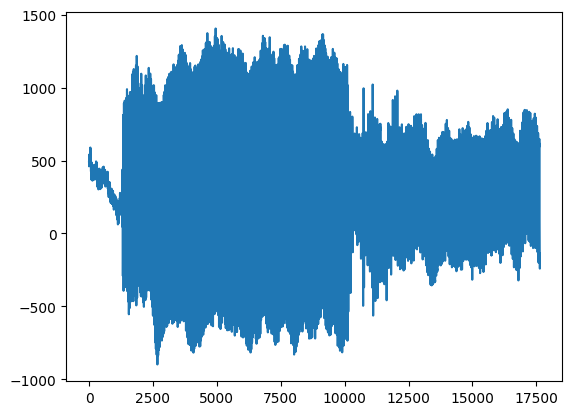

In [453]:
plt.plot(s1)

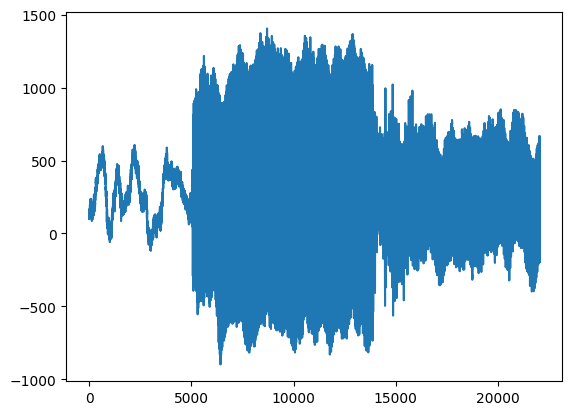

In [469]:
plt.plot(s2[:])

In [472]:
x, y = a.fourier_abs(s2[3000])

TypeError: object of type 'numpy.int16' has no len()

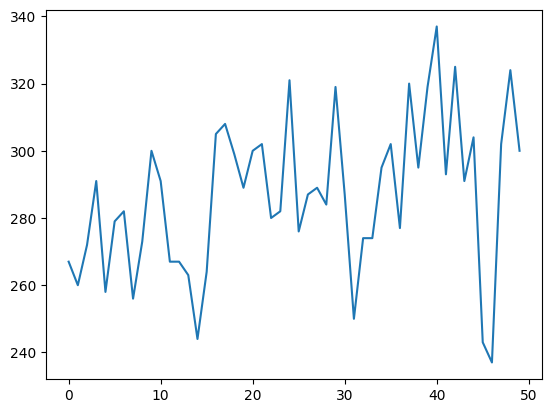

In [471]:
plt.plot(data[0:50])

In [409]:
td, tc = correction_array(code_array)
len(td)

36

In [423]:
p, amplit = get_max_param_threshold(td, tc)

MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS
MAKING PROGRESS


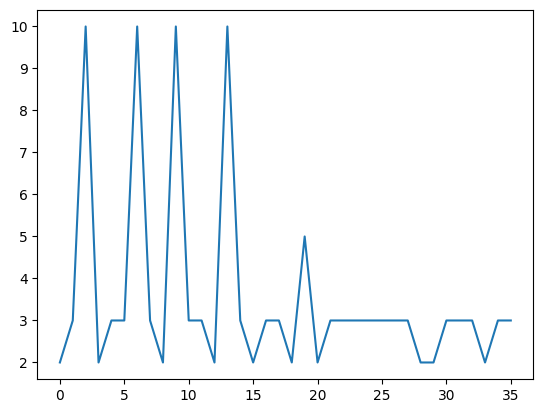

In [424]:
plt.plot(p)

In [281]:
x, y = a.fourier_for_array(a.secure_split(data, 32), 44100)
a.freq_sum(y[0], x, 1000)

23871.515571820455

In [285]:
TrainingDataset = pd.DataFrame()
TrainingDataset[[f"f{i}_freq1" for i in range(64)]] = 0
TrainingDataset[[f"f{i}_freq2" for i in range(64)]] = 0
TrainingDataset["max_param"] = 0
TrainingDataset["amp_threshold"] = 0



/tmp/ipykernel_5085/1676774380.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TrainingDataset[[f"f{i}_freq2" for i in range(64)]] = 0
/tmp/ipykernel_5085/1676774380.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  TrainingDataset[[f"f{i}_freq2" for i in range(64)]] = 0
/tmp/ipykernel_5085/1676774380.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To

In [253]:
recording_no_stop(duration_array)

RECORDING
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Recording
MAKING PROGRESS
Re

In [ ]:
for i in range()